<html>
    <body>
        <h1 style="background-color:powderblue;">L’interpolation polynômiale</h1>
    </body>
 </html>   

C:\Users\Rania\anaconda3\lib\tkinter\__init__.py:1883: RankWarning: Polyfit may be poorly conditioned
  return self.func(*args)


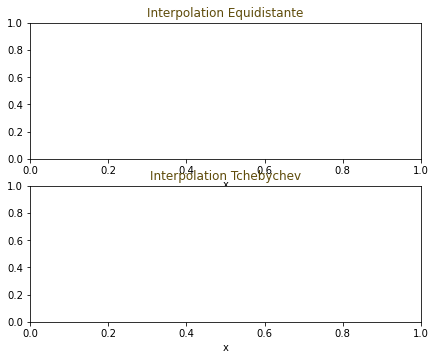

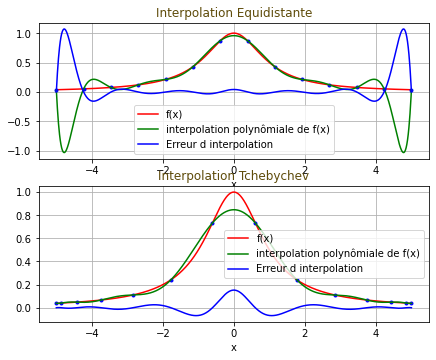

In [1]:
from tkinter import *
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg



class mclass:

    def __init__(self, window):
        self.window = window
        self.fr1 = Frame(window,highlightbackground="black", highlightthickness=2, width=100, height=100, bd= 5)
        self.fr2 = Frame(window,highlightbackground="darkgray", highlightthickness=2, width=100, height=100, bd= 5)
        self.n_txt=StringVar()
        self.n_txt.set("Choisir point de Tchebychev: ")
        self.label_n = Label(self.fr1, textvariable=self.n_txt,justify=RIGHT, anchor="w", height=4)
        self.label_n.grid(sticky = E, row=1, column=0)
        
        self.slider = Scale(self.fr1, from_=7, to=20, orient=HORIZONTAL)
        self.slider.grid(sticky = W , row=1, column=1)

        self.func_txt = StringVar()

        self.func_txt.set("La fonction f(x) :")
        self.labelFunc = Label(self.fr1, textvariable=self.func_txt, height=2)
        self.labelFunc.grid(row=2,column=0, sticky=E, pady=10, padx=20)

        self.Func = StringVar()
        self.boxF = Entry(self.fr1, bd=4, width=40, textvariable=self.Func)
        self.boxF.grid(sticky = W , row=2, column=1, pady=10, padx=10)

        self.text_a = StringVar()
        self.text_a.set("La valeur de a :")
        self.label_a = Label(self.fr1, textvariable=self.text_a, height=2)
        self.label_a.grid(row=3,column=0, sticky=E, pady=10, padx=20)

        self.a = StringVar()
        self.boxa = Entry(self.fr1, bd=4, width=40, textvariable=self.a)
        self.boxa.grid(sticky = W , row=3, column=1, pady=10, padx=10)

        self.text_b = StringVar()
        self.text_b.set("La valeur de  b :")
        self.label_b = Label(self.fr1, textvariable=self.text_b, height=2)
        self.label_b.grid(row=4,column=0, sticky=E, pady=10, padx=20)

        self.b = StringVar()
        self.boxb = Entry(self.fr1, bd=4, width=40, textvariable=self.b)
        self.boxb.grid(sticky = W , row=4, column=1, pady=10, padx=10)
        
        self.fig = plt.figure(figsize=(7, 5.5))
        self.a = self.fig.add_subplot(211)
        self.a.set_title("Interpolation Equidistante", color="#5F4C0B")
        self.a.set_xlabel('x')
        self.b = self.fig.add_subplot(212)
        self.b.set_title('Interpolation Tchebychev', color="#5F4C0B")
        self.b.set_xlabel('x')
    

        self.canvas = FigureCanvasTkAgg(self.fig, master=self.fr2)
        self.canvas.get_tk_widget().pack()
        self.canvas.draw()
        
        self.fr1.grid(row=1,column=0,padx=10,pady=10,sticky="ns")
        self.fr2.grid(row=1,column=1,padx=10,pady=10)
           
        self.button = Button(self.fr1, text="  PLOT  ", bg="#2F4F4F", fg="white",width=20, command=self.plot)
        self.button.grid(row=5, column=1 , pady=20, padx=20)

    def plot(self):
        
            N = int(self.slider.get())
            F = self.boxF.get().lower().replace(' ', '')
            f = lambda x: eval(F)
            a = float(self.boxa.get())
            b = float(self.boxb.get())

           

            X = np.linspace(a, b, N)
            p = np.polyfit(X, f(X), N - 1)
            t = np.linspace(a, b, 1000)

            self.fig = plt.figure(figsize=(7, 5.5))
            self.a = self.fig.add_subplot(211)
            self.a.grid(True)
            self.a.plot(t, f(t), 'r', label='f(x)')
            self.a.plot(X, f(X), '.b')
            self.a.plot(t, np.polyval(p, t), 'g', label='interpolation polynômiale de f(x)')
            self.a.plot(t, f(t) - np.polyval(p, t), 'b', label='Erreur d interpolation')
            self.a.set_title("Interpolation Equidistante", color="#5F4C0B")
            self.a.set_xlabel('x')
            self.a.legend()

            xi = [None] * N
            yi = [None] * N
            for k in range(0,N):
                xi[k] = (a + b) / 2 + (a - b) / 2 * math.cos((k) / (N-1) * math.pi)
                yi[k] = f(xi[k])

            pt = np.polyfit(xi, yi, N)

            self.b = self.fig.add_subplot(212)
            self.b.grid(True)
            self.b.plot(t, f(t), 'r', label='f(x)')
            self.b.plot(xi, yi, '.b')
            self.b.plot(t, np.polyval(pt, t),'g', label='interpolation polynômiale de f(x)')
            self.b.plot(t, f(t) - np.polyval(pt, t), 'b', label='Erreur d interpolation')
            self.b.set_title('Interpolation Tchebychev', color="#5F4C0B")
            self.b.set_xlabel('x')
            self.b.legend()

            self.canvas = FigureCanvasTkAgg(self.fig, master=self.fr2)
            self.canvas.draw()
           
if __name__ == '__main__':
    
    window= Tk()

    start= mclass(window)

    window.mainloop()
   